In [5]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Updated data with classified re-hosp saved to general.csv


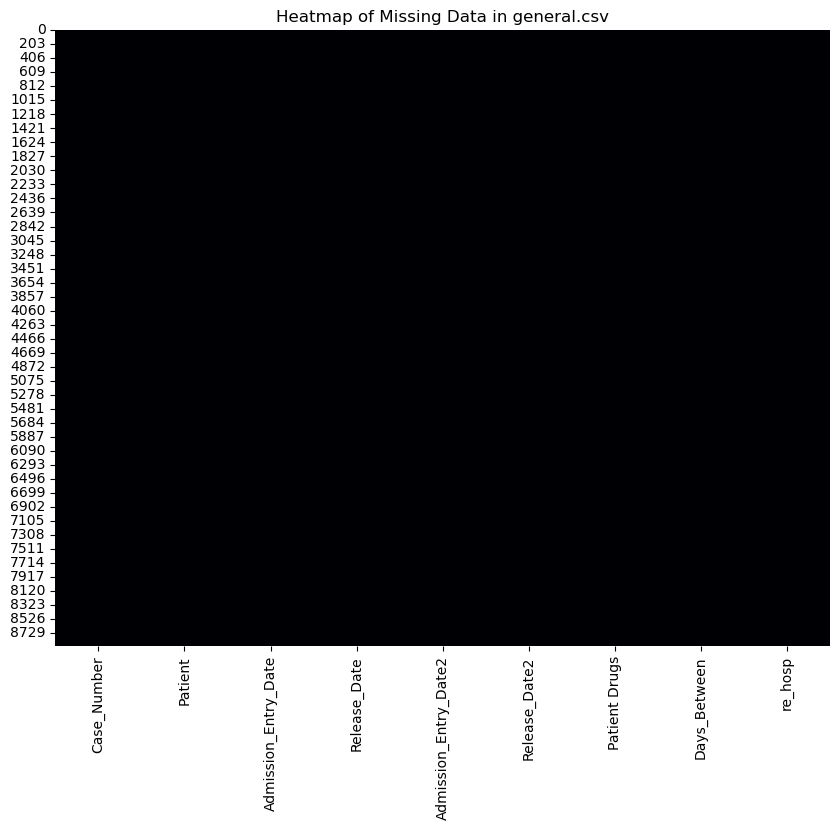

   Case_Number Patient Admission_Entry_Date        Release_Date  \
0            1  430047     16/02/2021 17:33 2021-02-19 12:40:00   
1            2  447962     07/08/2022 13:27 2022-08-08 15:15:00   
2            3  214558     27/10/2023 07:34 2023-10-29 17:18:00   
3            4   71277     29/07/2020 17:00 2020-08-03 14:26:00   
4            5  112016     03/07/2021 11:42 2021-07-05 17:34:00   

  Admission_Entry_Date2     Release_Date2  \
0   2021-02-24 15:03:00  25/02/2021 12:38   
1   2022-09-01 04:20:00  02/09/2022 16:00   
2   2023-10-30 17:58:00  01/11/2023 15:33   
3   2020-08-30 04:25:00  03/09/2020 13:45   
4   2021-07-13 01:21:00  15/07/2021 11:48   

                                       Patient Drugs  Days_Between  re_hosp  
0   10069 , 1011 , 10417 , 11126 , 1988 , 2043 , ...             5        0  
1   11954 , 12536 , 12740 , 139 , 2043 , 2187 , 2...            23        2  
2   10252 , 11517 , 1183 , 12314 , 12727 , 1301 ,...             1        0  
3   1120 , 125

In [6]:

# Step 1: Load Data from Excel
file_path = 'rehospitalization.xlsx'
hospitalization2_df = pd.read_excel(file_path, sheet_name='hospitalization2')
general_data_df = pd.read_excel(file_path, sheet_name='GeneralData')

# Step 2: Convert date columns to datetime format
hospitalization2_df['Admission_Entry_Date'] = pd.to_datetime(hospitalization2_df['Admission_Entry_Date'], dayfirst=True)
hospitalization2_df['Release_Date'] = pd.to_datetime(hospitalization2_df['Release_Date'], dayfirst=True)
hospitalization2_df['Admission_Entry_Date2'] = pd.to_datetime(hospitalization2_df['Admission_Entry_Date2'], dayfirst=True)
hospitalization2_df['Release_Date2'] = pd.to_datetime(hospitalization2_df['Release_Date2'], dayfirst=True)

# Step 3: Select relevant columns
selected_columns_df = hospitalization2_df[['Patient', 'Admission_Entry_Date', 'Release_Date', 'Admission_Entry_Date2', 'Release_Date2']]

# Step 4: Assign a unique case number to each row
selected_columns_df = selected_columns_df.reset_index(drop=True)
selected_columns_df.insert(0, 'Case_Number', selected_columns_df.index + 1)  # Add 1 to start case numbers from 1 instead of 0

# Step 5: Format datetime columns to ensure correct format in CSV
selected_columns_df['Admission_Entry_Date'] = selected_columns_df['Admission_Entry_Date'].dt.strftime('%d/%m/%Y %H:%M')
selected_columns_df['Release_Date'] = selected_columns_df['Release_Date'].dt.strftime('%d/%m/%Y %H:%M')
selected_columns_df['Admission_Entry_Date2'] = selected_columns_df['Admission_Entry_Date2'].dt.strftime('%d/%m/%Y %H:%M')
selected_columns_df['Release_Date2'] = selected_columns_df['Release_Date2'].dt.strftime('%d/%m/%Y %H:%M')

# Step 6: Extract Patient Drugs from GeneralData
# Assuming column 'תרופות קבועות' is the drug column in GeneralData sheet.
general_data_df['Patient'] = general_data_df['Patient'].astype(str)
general_data_df['Patient Drugs'] = general_data_df['תרופות קבועות'].fillna('').astype(str)

# Step 7: Merge Patient Drugs with selected columns DataFrame
# Convert Patient ID in selected_columns_df to string for matching
selected_columns_df['Patient'] = selected_columns_df['Patient'].astype(str)
selected_columns_df = pd.merge(selected_columns_df, general_data_df[['Patient', 'Patient Drugs']], on='Patient', how='left')

# Step 8: Add new column based on date difference
# Convert string dates back to datetime for calculation
selected_columns_df['Release_Date'] = pd.to_datetime(selected_columns_df['Release_Date'], format='%d/%m/%Y %H:%M')
selected_columns_df['Admission_Entry_Date2'] = pd.to_datetime(selected_columns_df['Admission_Entry_Date2'], format='%d/%m/%Y %H:%M')

# Calculate days difference and apply conditions
selected_columns_df['Days_Between'] = (selected_columns_df['Admission_Entry_Date2'] - selected_columns_df['Release_Date']).dt.days

# Step 9: Define the classification logic for re_hospitalization
def classify_re_hosp(days_between):
    if days_between <= 11:
        return 0  # High re-hospitalization risk
    elif 11 < days_between <= 20:
        return 1  # Medium re-hospitalization risk
    else:
        return 2  # Low re-hospitalization risk

# Apply the classification to the 'Days_Between' column
selected_columns_df['re_hosp'] = selected_columns_df['Days_Between'].apply(classify_re_hosp)

# Step 10: Save the updated DataFrame to a CSV file
output_file_path = 'general.csv'
selected_columns_df.to_csv(output_file_path, index=False)
print(f"Updated data with classified re-hosp saved to {output_file_path}")

# Step 11: Visualize missing data
plt.figure(figsize=(10, 8))
sns.heatmap(selected_columns_df.isnull(), cbar=False, cmap='inferno')
plt.title('Heatmap of Missing Data in general.csv')
plt.show()

# Step 12: Display the first few rows to ensure the data is correct
print(selected_columns_df.head())

# Step 13: Check for missing values in each column
print("\nChecking for missing values in each column:")
print(selected_columns_df.isnull().sum())

# Step 14: Summary statistics for the numerical columns
print("\nSummary statistics for numerical columns:")
print(selected_columns_df.describe())


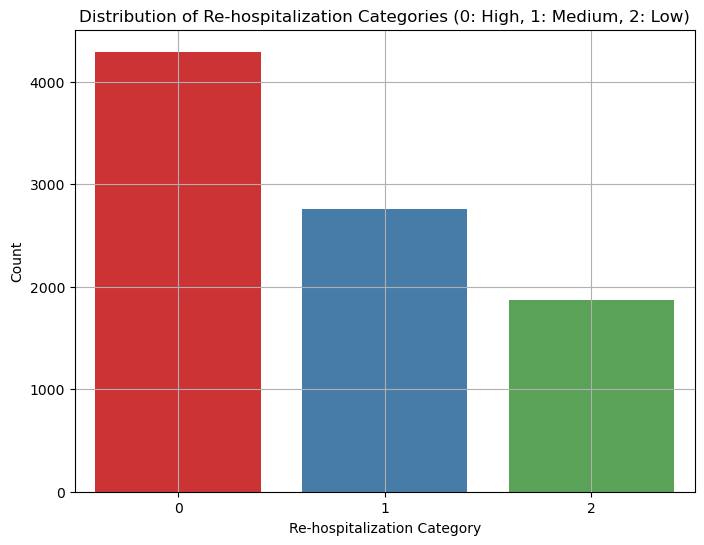

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the re_hosp classification
plt.figure(figsize=(8, 6))
sns.countplot(x='re_hosp', data=data_df, palette='Set1')
plt.title('Distribution of Re-hospitalization Categories (0: High, 1: Medium, 2: Low)')
plt.xlabel('Re-hospitalization Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()


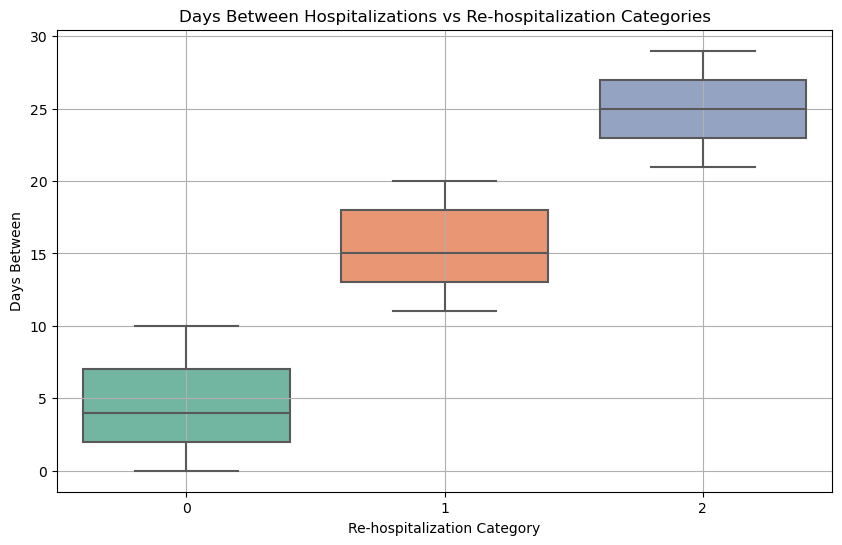

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='re_hosp', y='Days_Between', data=data_df, palette='Set2')
plt.title('Days Between Hospitalizations vs Re-hospitalization Categories')
plt.xlabel('Re-hospitalization Category')
plt.ylabel('Days Between')
plt.grid(True)
plt.show()


Methodology:

In this task, the goal was to classify patients based on the time interval between their first and second hospitalizations into three categories: high (0), medium (1), and low (2) re-hospitalization risks. We started by calculating the number of days between the discharge date of the first hospitalization and the admission date of the second hospitalization. A classification was applied where fewer than 11 days indicated a high re-hospitalization risk, 11-20 days indicated medium risk, and more than 20 days indicated low risk. The data was then checked for completeness, and visualizations were generated to inspect the distribution of re-hospitalization categories and their relationship with the days between hospitalizations. This analysis provides valuable insights into the temporal patterns of patient re-hospitalizations.